In [1]:
from moddipic.rdkit import *
from moddipic.generic.ligand import *
from moddipic.core.pipeline import Pipeline, OutputBlock
from moddipic.core.data import Batched

from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
class MyPipe(Pipeline):
    name = "mypipe"
    def build(self):
        self.add_block(RDKitLigandHAdder(), "hadder")
        self.add_block(RDKitMWLigSelector(), "mwselector")
        self.add_block(RDKitLigandEmbedder(), "embedder")
        self.add_block(RDKitTautEnumerator(flatten=False), "tautenum")
        self.add_block(RDKitStereoEnumerator(flatten=True), "stereoenum")
        self.add_block(RDKitRingEnumerator(flatten=True), "ringenum")
        self.add_block(LigandSaver("prepped_ligands"), "saver")
        self.add_block(OutputBlock(["ligands"]), "output")
        self.add_connection("hadder", "ligands", "embedder", "ligands")
        self.add_connection("embedder", "ligands", "mwselector", "ligands")
        self.add_connection("mwselector", "ligands", "tautenum", "ligands")
        self.add_connection("tautenum", "ligands", "stereoenum", "ligands")
        self.add_connection("stereoenum", "ligands", "ringenum", "ligands")
        self.add_connection("ringenum", "ligands", "output", "ligands")
        self.add_connection("ringenum", "ligands", "saver", "ligands")
        

In [3]:
pipe = MyPipe(base_dir="testtttt")

In [4]:
mol = Chem.MolFromSmiles("CCC(=O)CCC(=O)C=CCC1CCCCC1")
# mol = Chem.AddHs(mol)
# AllChem.EmbedMolecule(mol)
pipe.execute(ligands=Batched([mol]))


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>                 STARTED: mypipe                   >>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

[Running Pipe Block: (hadder) RDKit Hydrogen Adder]


100%|██████████| 1/1 [00:00<00:00, 1679.74it/s]



[Running Pipe Block: (embedder) RDKit Ligand Embedder]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 12.38it/s]



[Running Pipe Block: (mwselector) RDKit Ligand Weight Filtering]

[Running Pipe Block: (tautenum) RDKIT Tautomer Enumerator]


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]



[Running Pipe Block: (stereoenum) RDKIT Stereoisomer Enumerator]


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]



[Running Pipe Block: (ringenum) RDKIT Ring Conformation Enumerator]


100%|██████████| 1/1 [00:14<00:00, 14.10s/it]


[Running Pipe Block: (saver) Ligand Saver Block]

[Running Pipe Block: (output) Output Block]

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<                  ENDED: mypipe                    <<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


{'ligands': <src_new.core.data.Batched at 0x7f845775cdf0>}

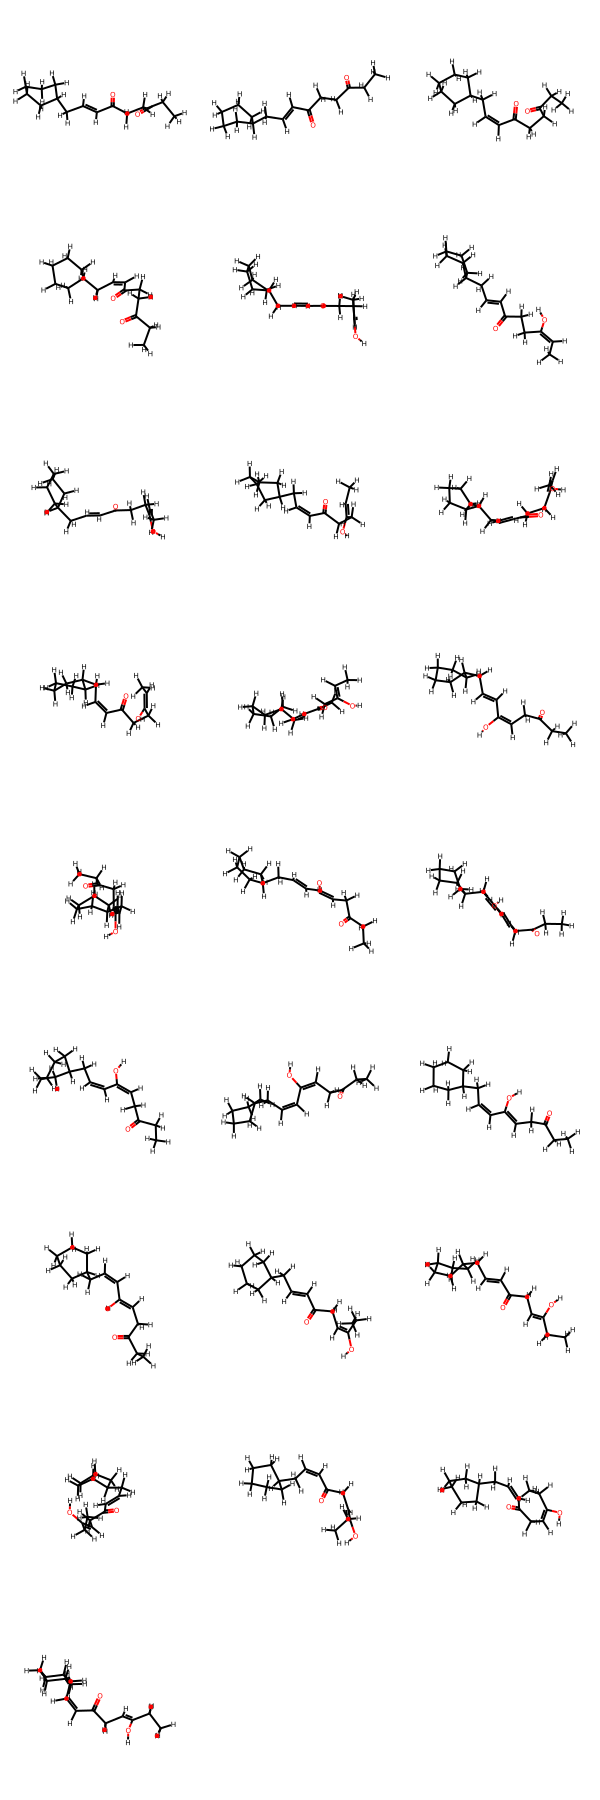

In [5]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(pipe._output["ligands"].data[0].data)

In [6]:
pipe._output["ligands"].get_depth()

1

In [7]:
pipe._output["ligands"].flatten().data[0].data[0].data[0].data

AttributeError: 'Batched' object has no attribute 'flatten'